In [1463]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
import seaborn as sns
import scipy.stats as stats
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [1464]:
# Amazon Raw Data
data_path = ("https://raw.githubusercontent.com/borja876/Thinkful-DataScience-Borja/master/amazon_cells_labelled.txt"
            )
amazon = pd.read_csv(data_path, delimiter= '\t', header=None)
amazon.columns = ['Sentence', 'Sentiment']
#sms_raw.head(30)  
amazon.loc[amazon['Sentiment'] == 1].head()

,Sentence,Sentiment
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
4,The mic is great.,1
7,If you are Razr owner...you must have this!,1
10,And the sound quality is great.,1


In [1465]:
# Split the dataset in train and test 80% and have freedom to play with the ratio
msk = np.random.rand(len(amazon)) < 0.8
train, test = amazon[msk].copy(deep = True), amazon[~msk].copy(deep = True)

In [1466]:
# Rows in the dataset and label
amazon['Sentiment'].value_counts()

1    500
0    500
Name: Sentiment, dtype: int64

In [1467]:
 keywords =[ 'happier', 'nice','adorable',
            'excited', 'pleased','recommend',
            'crisp','increase','better',
            'significantly',
            'incredibly' ,'super','well', 'clear','securely',
            'ideal', 'happy','like', 'easy','amazed',
            'excellent', 'awesome','cool', 'fantastic','sturdy',
            'love', 'reasonable','great','impressed',
              'perfectly','surprised','right',
            'joy','satisfied','better','pretty','very good',
            'easier','fulfills','ideal', 'beautiful','best','comfortable' ,
            'incredible', 'extra', 'works','comfortably']
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon[str(key)] = amazon.Sentence.str.contains(
        ' '+str(key)+' ',
        case=False
    )

In [1468]:
amazon['allcaps'] = amazon.Sentence.str.isupper()

In [1469]:
amazon['Sentiment'] = (amazon['Sentiment'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

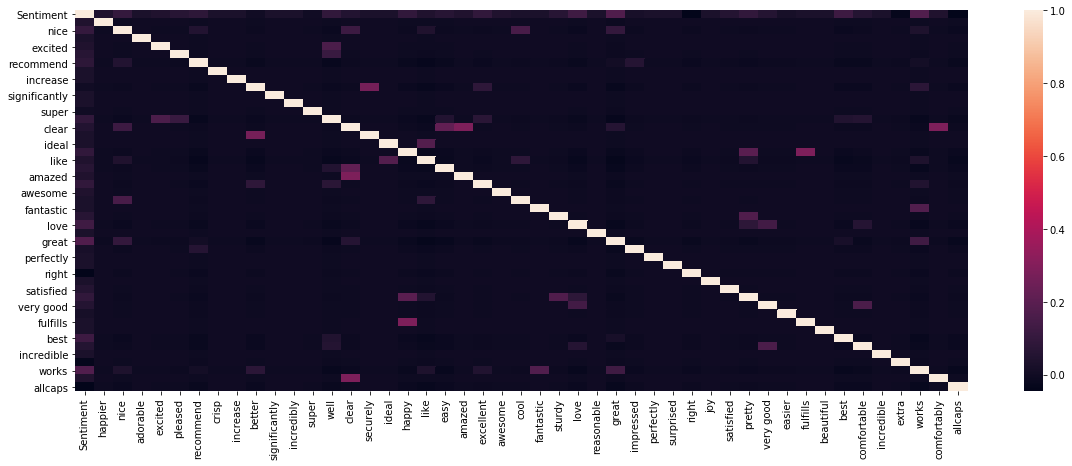

In [1470]:
plt.figure(figsize=(20, 7))
sns.heatmap(amazon.corr())

In [1471]:
data = amazon[keywords + ['allcaps']]
target = amazon['Sentiment']

In [1472]:
# Initantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

confusion_matrix(target, y_pred)

Number of mislabeled points out of a total 1000 points : 320


array([[470,  30],
       [290, 210]], dtype=int64)

In [1473]:
#####from confusion matrix calculate accuracy
cm = confusion_matrix(target, y_pred)

total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Specifity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specifity : ', Specifity )

Sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', Sensitivity)

Accuracy :  0.68
Specifity :  0.94
Sensitivity :  0.42


##### Splitting the data in a train and a test subset

**Training the clasifier with 80% of the data**

In [1474]:
 keywords =[ 'nice', 'pleased', 'better',           
        'like', 'easy', 'excellent',
        'love','impressed',
        'satisfied','better','pretty',
        'best','works great']
    
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    train[str(key)] = train.Sentence.str.contains(
        ' '+str(key)+' ',
        case=False
    )

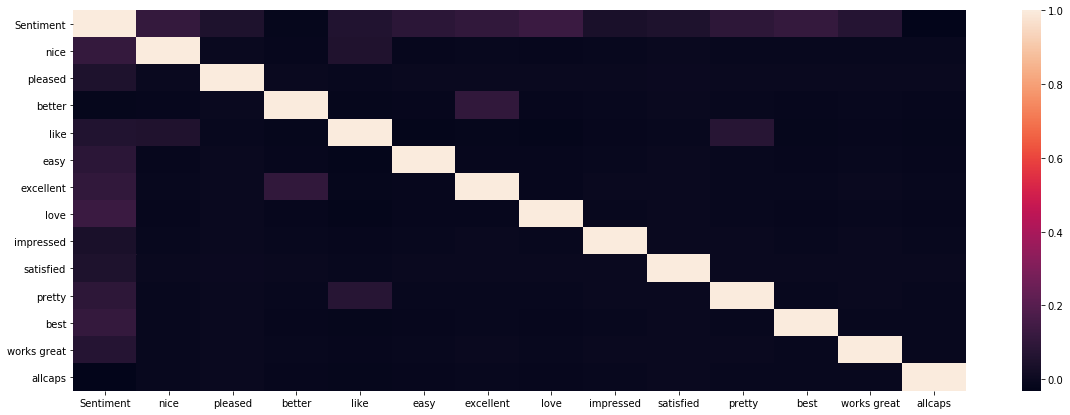

In [1475]:
train['allcaps'] = train.Sentence.str.isupper()
train['Sentiment'] = (train['Sentiment'] == 1)
plt.figure(figsize=(20, 7))
sns.heatmap(train.corr())

In [1476]:
data1 = train[keywords + ['allcaps']]
target1 = train['Sentiment']

In [1477]:
# Initantiate our model and store it in a new variable.
bnb2 = BernoulliNB()

# Fit our model to the data.
bnb2.fit(data1, target1)

# Classify, storing the result in a new variable.
y_pred1 = bnb2.predict(data1)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data1.shape[0],
    (target1 != y_pred1).sum()
))

confusion_matrix(target1, y_pred1)

Number of mislabeled points out of a total 807 points : 322


array([[408,  10],
       [312,  77]], dtype=int64)

In [1478]:
#####from confusion matrix calculate accuracy
cm1 = confusion_matrix(target1, y_pred1)

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

Specifity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specifity : ', Specifity1 )

Sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', Sensitivity1)

Accuracy :  0.600991325898
Specifity :  0.976076555024
Sensitivity :  0.19794344473


**Test the result of training the model**

In [1479]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    test[str(key)] = test.Sentence.str.contains(
        ' '+str(key)+' ',
        case=False
    )
test['allcaps'] = test.Sentence.str.isupper()
test['Sentiment'] = (test['Sentiment'] == 1)

In [1480]:
data2 = test[keywords +['allcaps']]
target2 = test['Sentiment']

In [1481]:
# Initantiate our model and store it in a new variable.
bnb2 = BernoulliNB()

# Fit our model to the data.
bnb2.fit(data2, target2)

# Classify, storing the result in a new variable.
y_pred2 = bnb2.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != y_pred2).sum()
))

confusion_matrix(target2, y_pred2)

Number of mislabeled points out of a total 193 points : 79


array([[ 11,  71],
       [  8, 103]], dtype=int64)

In [1482]:
#####from confusion matrix calculate accuracy
cm2 = confusion_matrix(target2, y_pred2)

total2=sum(sum(cm2))
accuracy2=(cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy2)

Specifity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Specifity : ', Specifity2 )

Sensitivity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Sensitivity : ', Sensitivity2)

Accuracy :  0.59067357513
Specifity :  0.134146341463
Sensitivity :  0.927927927928


### Cross validation & feature selection

In [1483]:
#Features tester considering cross-validation


#Iterative Model # 6 based on cross validation
keywords =['pleased', 'better', 'excellent','impressed','satisfied','better','pretty']
   
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    train[str(key)] = train.Sentence.str.contains(
        ' '+str(key)+' ',
        case=False
    )
amazon['allcaps'] = amazon.Sentence.str.isupper()
amazon['Sentiment'] = (amazon['Sentiment'] == 1)
datacv = amazon[keywords+['allcaps']]
targetcv = amazon['Sentiment']

In [1484]:
# Initantiate our model and store it in a new variable.
bnbcv = BernoulliNB()

# Fit our model to the data.
bnbcv.fit(datacv, targetcv)

# Classify, storing the result in a new variable.
y_predcv = bnbcv.predict(datacv)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    datacv.shape[0],
    (targetcv != y_predcv).sum()
))

confusion_matrix(targetcv, y_predcv)

Number of mislabeled points out of a total 1000 points : 475


array([[497,   3],
       [472,  28]], dtype=int64)

In [1485]:
#Cross validation, scores
skf = StratifiedKFold(n_splits=10, random_state=0)
scores = cross_val_score(bnb, datacv, targetcv, cv=skf)

#Test the prediction capacity of the model
predicted = cross_val_predict(bnb, datacv, y_predcv, cv=skf)
prediction = metrics.accuracy_score(targetcv, predicted)

#Print scores, accuracy of the model and prediction
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Prediction: %0.2f " % (prediction))

[ 0.53  0.5   0.49  0.5   0.53  0.52  0.53  0.51  0.53  0.53]
Accuracy: 0.52 (+/- 0.03)
Prediction: 0.52 


In [1486]:
# Recursive Feature Elimination for cross validation

# create the RFE model and select 3 attributes
rfe = RFE(bnb, 8)
fit = rfe.fit(datacv, targetcv)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
print(datacv.head(0))

[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]
Empty DataFrame
Columns: [pleased, better, excellent, impressed, satisfied, better, pretty, allcaps]
Index: []


#### Results of the iterations to improve the classifier´s performance

##### First Classifier (w/o Training)

**keywords**

            'wanted','important','sturdiness','encourage',
            'happier','comfort','excited', 'flawlessly',
            'pleased','outperform','stars''adorable', 'more',
            'crisp','increase','better','thumbs','price','very', 'significantly',
            'strong','perfectly','surprised','amazed','sturdy', 'securely','right',
            'joy','finally','satisfied','better', 'pretty','easy','10','easier','fulfills','ideal',
            'beautiful','best','works','comfortable' ,'comfortably','charm','incredible', 'extra',
            'quality','incredibly' ,'super','well','nice', 'clear','finished','well','more', 'ideal',
            'recommend','good','happy','like', 'excellent', 'awesome','cool', 'fantastic','ok','love',
            'reasonable','fine','great','impressed'

##### Second iteration

**keywords**

            'happier', 'nice','adorable',
            'excited', 'pleased','recommend',
            'crisp','increase','better','significantly',
            'incredibly' ,'super','well', 'clear','securely',
            'ideal', 'happy','like', 'easy','amazed',
            'excellent', 'awesome','cool', 'fantastic','sturdy',
            'love', 'reasonable','fine','great','impressed',
             'perfectly','surprised','right',
            'joy','satisfied','better','pretty','very good',
            'easier','fulfills','ideal', 'beautiful','best','comfortable' ,
            'incredible', 'extra', 'works','comfortably'

##### Third iteration

**keywords**

            'nice', 'pleased',
            'better','like', 'easy',
            'excellent', 'awesome','cool',
            'love','great','impressed',
            'satisfied','better','pretty','very good',
            'best','extra', 'works'


##### Fourth iteration

**keywords**

            'nice','pleased', 'better','like', 'easy',
            'excellent','cool',
            'love','great','impressed',
            'satisfied','better','pretty',
            'best','extra','works'

##### Fifth iteration

**keywords**

            'nice', 'pleased', 'better',           
            'like', 'easy', 'excellent',
            'love','impressed',
            'satisfied','better','pretty',
            'best','works great'

**Do any of your classifiers seem to overfit?**

The classifiers that were done with the 80/20 approach seem to overfit. It seems that 54% of accuracy for this model is significant with the amount of data in the dataset and can be explained with 11 features. The first model had 66 features achieving an accuracy of 62%. The reduction of features was done, first without reducing the accuracy and later reducing ther accuracy and finding that from 10 to 8 features the accuracy reduction is of 0.02.

**Which seem to perform the best? Why?**

The classifier that seems to be performing best is the last one becuase it is not overfitted due to the number of features used and the accuracy is higher than in other classifiers that have been tried before, having less false positives and false negatives

**What features seemed to be most impactful to performance?**
The ones left throught eh RFE method to eliminate parameters maintaining the level of accuracy